#Encontro 09

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 6.2 (pág. 189).

**Hoje:**
1. Descrever modelos contínuos quanto aos resultados teóricos.
2. Explicar a utilizada de modelos probabilísticos no contexto da literatura estatística.
3. Contrastar resultados teóricos e empíricos.
4. Fechamento do conteúdo.

**Próxima aula:**
> 1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

Nessa aula, teremos contato com algumas distribuições contínuas e como essas podem ser utilizadas para modelagem de dados reais.

**Distribuição Exponencial**

A distribuição Exponencial é conhecida, principalmente, por sua adequação na modelagem de variáveis que descrevem tempo de vida de produtos e materiais. Teoricamente, a função densidade de probabilidade (FDP) de uma distribuição Exponencial com parâmetro $\alpha$, com $\alpha > 0$, é definida por:

$$f(x|\alpha) = f(x) = \alpha e^{-\alpha x},$$

com $x \geq 0$. Quando uma variável $X$ tem distribuição Exponencial com parâmetro $\alpha$, pode-se afirmar que sua esperança e variância são dadas, respectivamente, por $E(X) = \frac{1}{\alpha}$ e $\mathrm{Var}(X) = \frac{1}{\alpha^2}$.

A Figura 1 mostra a distribuição Exponencial para alguns valores do parâmetro $\alpha = \frac{1}{2}; 1; \frac{3}{2}; 3$.

<img src="Exponencial1.png"/>
<center><sup>**Figura 1.** Função densidade de probabilidade da Exponencial para alguns valores de $\alpha$.</sup></center>

Para calcular a probabilidade da variável $X$ não exceder um valor $k$, é necessário obter a área abaixo da curva até esse ponto, isto é, calcular por integral a $P(X \leq k)$. Essa probabilidade pode ser obtida pela função de distribuição acumulada (FDA) no ponto $k$ que, no caso da Exponencial, é dada por:

$$F(k) = P(X \leq k) = \int^k_0 \alpha e^{-\alpha x} dx = 1 - e^{-\alpha k}$$

A Figura 2 mostra a função de distribuição da Exponencial para alguns valores do parâmetro $\alpha = \frac{1}{2}; 1; \frac{3}{2}; 3$.

<img src="Exponencial2.png"/>
<center><sup>**Figura 2.** Função de distribuição acumulada da Exponencial para alguns valores de $\alpha$.</sup></center>

Como notação, utiliza-se $X \sim \mathrm{Exp}(\alpha)$ e lê-se: “a variável $X$ segue uma distribuição Exponencial com parâmetro $\alpha$”.

> **O que ajuda e o que atrapalha as vendas pela internet**

> *Assim como no desenho animado da Warner em que o Coiote persegue o Papa-Léguas, na internet o mais rápido leva a melhor. Um levantamento recente da consultoria americana Aberdeen Group mostra que, a cada segundo que uma página de uma loja online demora para carregar, há uma queda de 7% na conversão de vendas.*

> <sup>Fonte: http://exame.abril.com.br/revista-exame-pme/edicoes/75/noticias/venda-muito-mais-pela-internet</sup>

1) Considere a variável $T$: tempo, em segundos, para abertura de um site de loja virtual de domínio brasileiro com média igual a $1,09$ segundos e que essa variável seja modelada por uma distribuição Exponencial.

1.1. As linhas de comando descritas a seguir simulam uma base de dados para compor uma possível amostra 100 lojas virtuais a partir da sua distribuição teórica, ou seja, $T \sim \mathrm{Exp}(1,03)$. 

Compare a média (valor esperado) e a variância da amostra com as da distribuição geradora. A amostra seria bem modelada pela sua própria distribuição geradora?

In [2]:
# resultados simulados para compor a amostra
alpha = 1.03
n = 100
tempos = pd.Series(stats.expon.rvs(scale=alpha, size=n)) # vetor com dados simulados

1.2. Graficamente, há algumas opções para levantar indícios se uma distribuição de probabilidade irá fornecer um ajuste razoável aos dados. Dentre essas opções, temos:

* Histograma dos dados *versus* função densidade de probabilidade teórica.

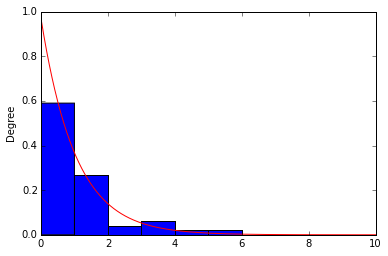

In [18]:
# histograma e densidade teórica
pd.DataFrame.plot(kind='hist', data=tempos, bins=range(0, 11), normed=True, legend=False)
a = pd.Series(range(1, 1001)) / 100
plt.plot(a, stats.expon.pdf(a, scale=alpha), '-', color='red')

* Quantis empíricos (dados ordenados) *versus* quantis teóricos.

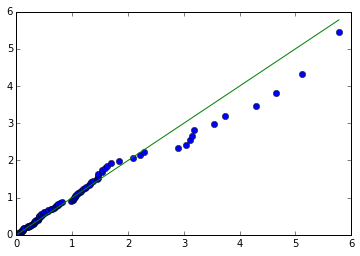

In [19]:
# dados ordenados e quantis teóricos - QQplot
tempos.sort()
fra = [] # frequencia relativa acumulada
for i in range(n):
  fra.append((i + 0.5) / n) # ver Magalhães e Lima (pag. 195)

q = stats.expon.ppf(fra, scale=alpha) # quantis teóricos

plt.plot(tempos, q, 'o')
plt.plot((min(tempos), max(tempos)), (min(tempos), max(tempos)), '-')

* Frequência relativa acumulada (a partir dos dados) *versus* função de distribuição acumulada.

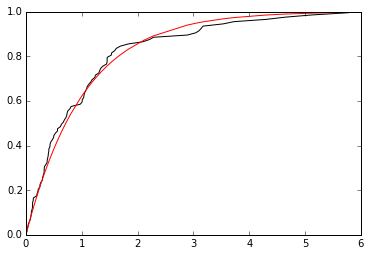

In [20]:
# fra e FDA
fda = stats.expon.cdf(tempos, scale=alpha) #FDA

plt.plot(tempos, fra, '-', color='black')
plt.plot(tempos, fda, '-', color='red')

Considerando os gráficos anteriores, descreva se há indícios de concordância entre modelo teórico e dados (amostra simulada). Note que seus argumentos devem ser respaldados em cada resultado gráfico.

1.3. Qual o % de lojas na amostra que demoram mais do que um segundo para abrir o site? E qual a probabilidade desse resultado acontecer? Esses resultados deveriam ser iguais? Por quê?

1.4. **Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?**

2) Há outros modelos probabilísticos contínuos:

* Uniforme
* Normal
* Gamma
* t-Student
* LogNormal
* Beta
* F-Snedecor

Cada grupo de alunos deve ficar com uma distribuição e deve responder as seguintes perguntas:

2.1. Quais as características dessa distribuição (valores que a variável pode assumir, formato da distribuição, parâmetros que a descrevem, esperança e variância em função dos parâmetros.

2.2. Há algum tipo de variável que pode ser mais bem ajustada por essa distribuição teórica?

2.3. Essa distribuição é útil para a inferência estatística? (Os Capítulos 7 e 8 do Magalhães darão uma idéia de se sim ou não)
